# Newton's Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

x_data = np.array([1, 4, 5, 6])
y_data = np.array([0, 1.386294, 1.609438, 1.791759])


In [3]:
def divided_differences(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            F[i, j] = (F[i + 1, j - 1] - F[i, j - 1]) / (x[i + j] - x[i])

    return F[0]  


In [4]:
def newton_interpolation(x, y, x_interp):
    n = len(x)
    coeffs = divided_differences(x, y)
    p = coeffs[-1]  

    for i in range(n - 2, -1, -1):
        p = coeffs[i] + (x_interp - x[i]) * p

    return p


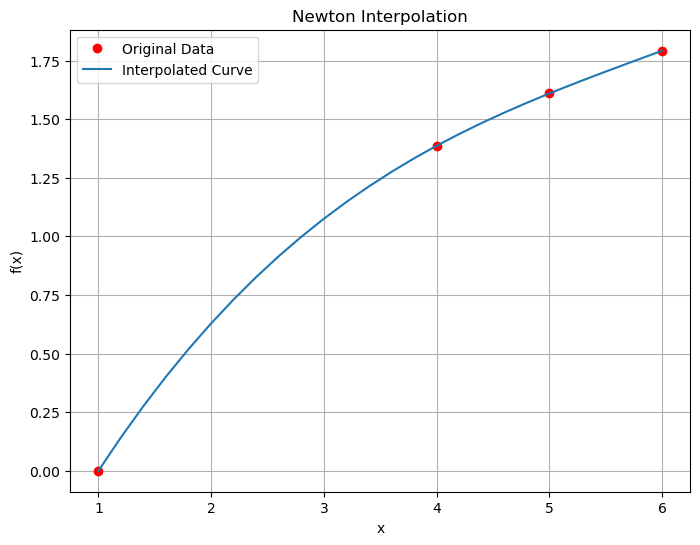

In [6]:
x_interp = np.arange(1, 6.2, 0.2)
y_interp = newton_interpolation(x_data, y_data, x_interp)

plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label='Original Data')
plt.plot(x_interp, y_interp, label='Interpolated Curve')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton Interpolation')
plt.legend()
plt.grid(True)
plt.show()


# Lagrange's Interpolation

In [7]:
def lagrange_interpolation(x, y, x_interp):
    n = len(x)
    y_interp = np.zeros_like(x_interp)

    for i in range(n):
        
        basis = np.ones_like(x_interp)
        for j in range(n):
            if i != j:
                basis *= (x_interp - x[j]) / (x[i] - x[j])

        y_interp += y[i] * basis

    return y_interp


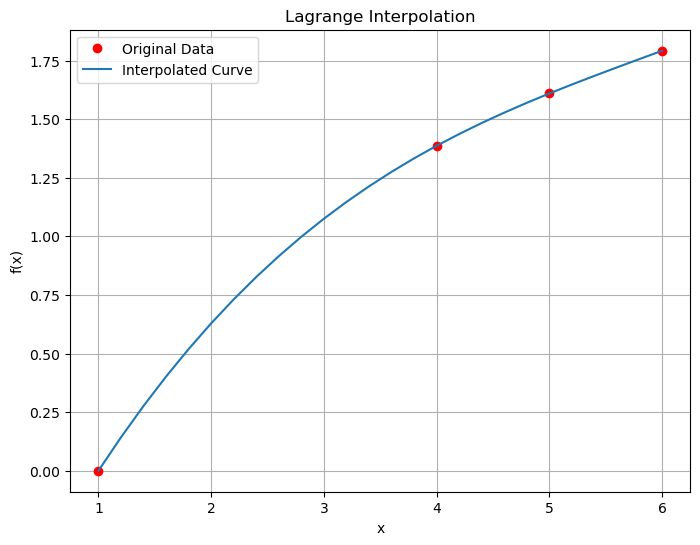

In [8]:
x_interp = np.arange(1, 6.2, 0.2)
y_interp = lagrange_interpolation(x_data, y_data, x_interp)

plt.figure(figsize=(8, 6))
plt.plot(x_data, y_data, 'ro', label='Original Data')
plt.plot(x_interp, y_interp, label='Interpolated Curve')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Lagrange Interpolation')
plt.legend()
plt.grid(True)
plt.show()
